In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


En İyi Hiperparametreler (MPA): [1.13976609e+02 5.96348984e+01 4.07669472e+01 7.23727386e-03]
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 179s 12s/step - accuracy: 0.4333 - loss: 1.1903 - val_accuracy: 0.4800 - val_loss: 1.1863 - learning_rate: 0.0072
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 196s 12s/step - accuracy: 0.6010 - loss: 0.9027 - val_accuracy: 0.3950 - val_loss: 1.2961 - learning_rate: 0.0072
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 203s 12s/step - accuracy: 0.6146 - loss: 0.8974 - val_accuracy: 0.4700 - val_loss: 1.2147 - learning_rate: 0.0072
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 164s 12s/step - accuracy: 0.6188 - loss: 0.8100 - val_accuracy: 0.5850 - val_loss: 0.8565 - learning_rate: 0.0072
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 159s 12s/step - accuracy: 0.6585 - loss: 0.8340 - val_accuracy: 0.5900 - val_loss: 0.9321 - learning_rate: 0.0072
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 189s 11s/step - accuracy: 0.6264 - loss: 0.8307 - val_accuracy: 0.5550 - val_loss: 0.8616 - learning_rate: 0.0072
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 213s 12s/step - accuracy: 0.6386 - loss: 0.7605 - val_a

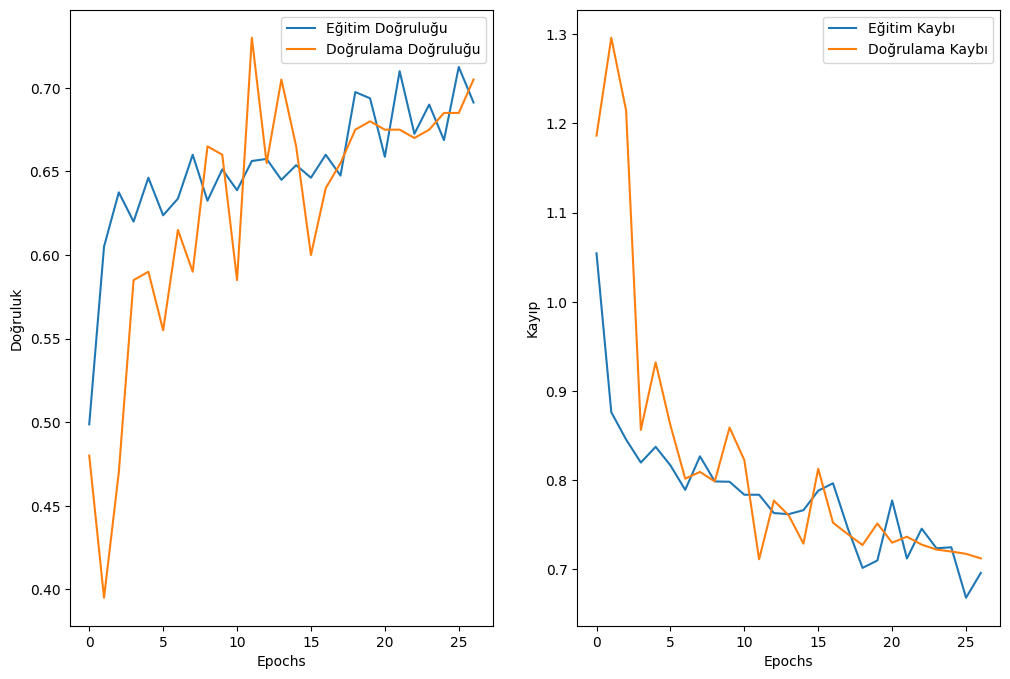

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 660s 26s/step - accuracy: 0.5209 - loss: 1.2586 - val_accuracy: 0.4050 - val_loss: 1.1382
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 653s 26s/step - accuracy: 0.6699 - loss: 0.7910 - val_accuracy: 0.2900 - val_loss: 1.2471
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 681s 26s/step - accuracy: 0.6969 - loss: 0.6852 - val_accuracy: 0.3200 - val_loss: 1.1833
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 682s 26s/step - accuracy: 0.7005 - loss: 0.6636 - val_accuracy: 0.4000 - val_loss: 1.1174
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 657s 25s/step - accuracy: 0.7425 - loss: 0.5706 - val_accuracy: 0.4950 - val_loss: 1.0279
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 697s 26s/step - accuracy: 0.7764 - loss: 0.5330 - val_accuracy: 0.5550 - val_loss: 0.9728
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 635s 26s/step - accuracy: 0.7445 - loss: 0.5643 - val_accuracy: 0.4500 - val_loss: 1.0828
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 658s 25

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, GlobalAveragePooling2D, Reshape, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# CLAHE ile Görüntü İşleme
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Hata: {image_path} konumundaki görüntü okunamadı.")
        return None
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)
    image = np.stack([image, image, image], axis=-1) / 255.0
    return image

# Veriyi yükleme ve etiketleme
def load_data(base_dir):
    classes = ['Dense', 'Medium_Dense', 'Sparse', 'None']
    image_paths, labels = [], []
    for cls in classes:
        class_dir = os.path.join(base_dir, cls)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            processed_image = preprocess_image(img_path)
            if processed_image is not None:
                image_paths.append(processed_image)
                labels.append(cls)
    data = np.array(image_paths)
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    return data, labels

# Hiperparametre Optimizasyonu için MPA Algoritması
def MPA(population_size, max_iter, search_space):
    pop = np.random.uniform([param[0] for param in search_space], [param[1] for param in search_space], (population_size, len(search_space)))
    fitness = np.array([objective_function(ind) for ind in pop])
    best_solution = pop[np.argmin(fitness)]
    best_fitness = np.min(fitness)

    for t in range(max_iter):
        for i in range(population_size):
            predator_effect = np.random.uniform(-1, 1, size=len(search_space)) * (best_solution - pop[i])
            pop[i] += predator_effect
            pop[i] = np.clip(pop[i], [param[0] for param in search_space], [param[1] for param in search_space])
            current_fitness = objective_function(pop[i])
            if current_fitness < fitness[i]:
                fitness[i] = current_fitness
            if current_fitness < best_fitness:
                best_solution = pop[i]
                best_fitness = current_fitness
    return best_solution

# CSTOA Algoritması
def CSTOA(population_size, max_iter, search_space):
    pop = np.random.uniform([param[0] for param in search_space], [param[1] for param in search_space], (population_size, len(search_space)))
    fitness = np.array([objective_function(ind) for ind in pop])
    best_solution = pop[np.argmin(fitness)]
    best_fitness = np.min(fitness)

    chaotic_map = np.random.rand(population_size, len(search_space))
    for t in range(max_iter):
        for i in range(population_size):
            if np.random.rand() < 0.5:
                chaotic_map[i] = chaotic_map[i] * np.sin(2 * np.pi * chaotic_map[i])
            else:
                chaotic_map[i] = chaotic_map[i] * np.cos(2 * np.pi * chaotic_map[i])
            new_solution = best_solution + chaotic_map[i] * (pop[i] - best_solution)
            new_solution = np.clip(new_solution, [param[0] for param in search_space], [param[1] for param in search_space])
            if np.random.rand() > 0.5:
                new_solution += np.random.uniform(-0.1, 0.1, size=len(search_space[0]))
            current_fitness = objective_function(new_solution)
            if current_fitness < fitness[i]:
                pop[i] = new_solution
                fitness[i] = current_fitness
            if current_fitness < best_fitness:
                best_solution = new_solution
                best_fitness = current_fitness
    return best_solution

# Ölçüt fonksiyonu (Objective function)
def objective_function(params):
    return np.sum(params**2)

# Model Oluşturma (InceptionV3 ve GRU ile)
def build_model(hyperparams):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(int(hyperparams[0]), activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Reshape((1, int(hyperparams[0]))),
        GRU(int(hyperparams[1]), return_sequences=True),
        GRU(int(hyperparams[2])),
        Dense(4, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=hyperparams[3]), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Model eğitimi ve veri artırma
def train_model(model, data, labels, epochs=500, batch_size=64):
    X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.4,
        height_shift_range=0.4,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    checkpoint = ModelCheckpoint('model_best.keras', save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6)
    history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        callbacks=[early_stopping, checkpoint, reduce_lr])
    return model, history

# Performans Karşılaştırmaları için GoogleNet ve VGGNet ile Modellerin Eğitimi
def train_alternate_models(X_train, y_train, X_val, y_val, epochs=100):
    models = {'GoogleNet': VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))}
    histories = {}
    for name, base_model in models.items():
        base_model.trainable = False
        model = Sequential([
            base_model,
            GlobalAveragePooling2D(),
            Dense(256, activation='relu'),
            BatchNormalization(),
            Dropout(0.5),
            Dense(4, activation='softmax')
        ])
        model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=1)
        histories[name] = history
    return histories

# G-Measure Hesaplama
def g_measure(precision, recall):
    return 2 * ((precision * recall) / (precision + recall))

# Eğitim Sonuçlarının Çizdirilmesi ve G-Measure Ekleme
def plot_metrics(history, y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    gmeasure = g_measure(precision, recall)

    print(f"F1 Score: {f1}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"G-Measure: {gmeasure}")

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label="Eğitim Doğruluğu")
    plt.plot(history.history['val_accuracy'], label="Doğrulama Doğruluğu")
    plt.xlabel("Epochs")
    plt.ylabel("Doğruluk")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label="Eğitim Kaybı")
    plt.plot(history.history['val_loss'], label="Doğrulama Kaybı")
    plt.xlabel("Epochs")
    plt.ylabel("Kayıp")
    plt.legend()
    plt.show()

# Ana Program
if __name__ == '__main__':
    base_dir = '/content/drive/MyDrive/Colab Notebooks/dataset/'
    data, labels = load_data(base_dir)
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    # MPA ve CSTOA ile Hiperparametre Optimizasyonu
    mpa_params = MPA(population_size=10, max_iter=50, search_space=[[64, 512], [32, 128], [32, 128], [0.0001, 0.01]])
    print("En İyi Hiperparametreler (MPA):", mpa_params)

    # Modelin Eğitimi
    model = build_model(mpa_params)
    model, history = train_model(model, data, labels)

    # Karışıklık Matrisi ve Metriklerin Çizdirilmesi
    y_pred = np.argmax(model.predict(X_test), axis=1)
    plot_metrics(history, y_test, y_pred)

    # Diğer Modeller ile Karşılaştırma
    alternate_histories = train_alternate_models(X_train, y_train, X_test, y_test)